C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

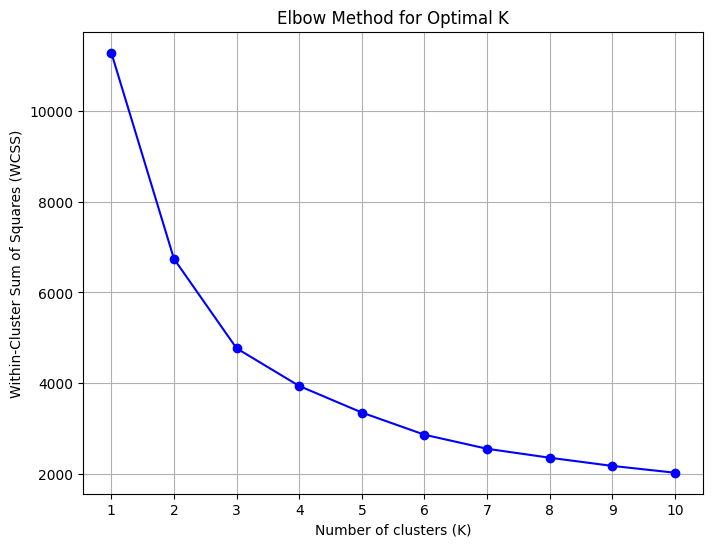

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Load and preprocess the dataset
# Replace the path with your dataset path or load from URL
data = pd.read_csv(r"D:\COLLEG_files\All_SEM_files\4th_Year\Sem_7\All_codes\LP_3\ML\sales_data_sample.csv", encoding='latin1')


# Step 3: Select relevant numeric features for clustering
# Using sales-related columns for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Step 4: Preprocess the data by selecting relevant features
# Dropping rows with missing values for simplicity
X = data[features].dropna()

# Step 5: Normalize the data (Optional but recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply K-Means for a range of K values and compute WCSS
WCSS = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)  # Inertia is the WCSS value

# Step 7: Plot the WCSS to find the "elbow" point
plt.figure(figsize=(8,6))
plt.plot(K_range, WCSS, 'bo-', marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.show()




In [2]:
# Step 8: Train the final K-Means model with the optimal K (based on the elbow method)
optimal_k = 4  # Replace with the K determined by the elbow method
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled)

# Step 9: Assign cluster labels and analyze the results
data['Cluster'] = kmeans_final.labels_

# List of columns used for clustering along with the new 'Cluster' column
columns_to_display = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'Cluster']

# Display only these columns from the DataFrame
print(data[columns_to_display].head(15))


    QUANTITYORDERED  PRICEEACH    SALES  MSRP  Cluster
0                30      95.70  2871.00    95        1
1                34      81.35  2765.90    95        1
2                41      94.74  3884.34    95        0
3                45      83.26  3746.70    95        0
4                49     100.00  5205.27    95        2
5                36      96.66  3479.76    95        1
6                29      86.13  2497.77    95        1
7                48     100.00  5512.32    95        2
8                22      98.57  2168.54    95        1
9                41     100.00  4708.44    95        2
10               37     100.00  3965.66    95        1
11               23     100.00  2333.12    95        1
12               28     100.00  3188.64    95        1
13               34     100.00  3676.76    95        1
14               45      92.83  4177.35    95        0


C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
print(data['Cluster'].value_counts())


Cluster
1    930
2    705
3    627
0    561
Name: count, dtype: int64
